In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dic = {'시간':[2,4,8,9], '성적':[20,40,80,90]}

In [3]:
data = pd.DataFrame(dic, index=['지영', '해도', '형', '태양'])
data

,시간,성적
지영,2,20
해도,4,40
형,8,80
태양,9,90


### 1. 수학 공식을 이용한 해석적 모델

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
Linear_model = LinearRegression()

In [6]:
Linear_model.fit(data[['시간']],data['성적'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
print(Linear_model.coef_) #가중치
print(Linear_model.intercept_)

[10.]
7.105427357601002e-15


직선 -> y = 10x+0

In [33]:
#예측
Linear_model.predict([[7]]) #predict는 미지의 데이터를 넣어줘야함

array([70.])

### 2.경사하강법
- 가중치(w)변화에 따른 비용함수(cost)값의 변화 그래프를 그려보자

H(x)

In [9]:
def h(w,x): #가설함수
    return w*x + 0

### Cost Function

In [10]:
def cost(data, target, weight): #MSE
    y_pre = h(weight, data) #가설함수에 대한 예측값
    return ((y_pre - target)**2).mean() # cost값 -> 작은 cost값 찾기

In [11]:
cost(data['시간'], data['성적'], 10) #'10'은 임의로 정한 가중치

0.0

In [31]:
cost(data['시간'], data['성적'], 12) #165라는 오차값 발생.

165.0

In [12]:
weight_arr=range(-10,31) # w : -10~30

In [13]:
cost_list=[]
for w in weight_arr:
    c = cost(data['시간'], data['성적'], w)
    cost_list.append(c)
cost_list

[16500.0,
 14891.25,
 13365.0,
 11921.25,
 10560.0,
 9281.25,
 8085.0,
 6971.25,
 5940.0,
 4991.25,
 4125.0,
 3341.25,
 2640.0,
 2021.25,
 1485.0,
 1031.25,
 660.0,
 371.25,
 165.0,
 41.25,
 0.0,
 41.25,
 165.0,
 371.25,
 660.0,
 1031.25,
 1485.0,
 2021.25,
 2640.0,
 3341.25,
 4125.0,
 4991.25,
 5940.0,
 6971.25,
 8085.0,
 9281.25,
 10560.0,
 11921.25,
 13365.0,
 14891.25,
 16500.0]

<function matplotlib.pyplot.show(*args, **kw)>

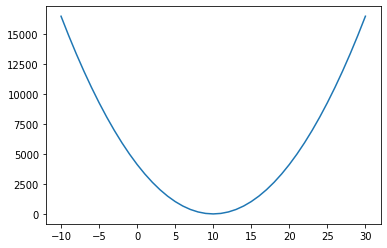

In [14]:
plt.plot(weight_arr, cost_list)
plt.show

## SGDRegressor 사용하기

In [15]:
from sklearn.linear_model import SGDRegressor

In [25]:
sgd_model = SGDRegressor(max_iter = 5000, #가중치 업데이트
                        eta0 = 0.01, #학습률(learning rate)
                        verbose = 1) #학습과정 눈으로 확인할 수 있는 키워드), 0으로 두게되면 보이지 않는다.

In [26]:
sgd_model.fit(data[['시간']],data['성적'])

-- Epoch 1
Norm: 8.49, NNZs: 1, Bias: 1.207604, T: 4, Avg. loss: 959.643225
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 9.50, NNZs: 1, Bias: 1.323629, T: 8, Avg. loss: 22.057521
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 9.72, NNZs: 1, Bias: 1.346364, T: 12, Avg. loss: 1.523383
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 9.79, NNZs: 1, Bias: 1.351327, T: 16, Avg. loss: 0.322710
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 9.81, NNZs: 1, Bias: 1.348677, T: 20, Avg. loss: 0.210055
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 9.81, NNZs: 1, Bias: 1.343348, T: 24, Avg. loss: 0.191302
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 9.81, NNZs: 1, Bias: 1.339149, T: 28, Avg. loss: 0.194562
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 9.82, NNZs: 1, Bias: 1.335912, T: 32, Avg. loss: 0.188646
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.82, NNZs: 1, Bias: 1.331458, T: 36, Avg. loss: 0.188640
Total training time: 0.00 seconds.
-- Epoch 

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=5000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=1,
             warm_start=False)

In [35]:
sgd_model.predict([[7]])

array([70.02298853])

In [29]:
print(sgd_model.coef_)#.coef_ : 가중치 확인
print(sgd_model.intercept_) # 편향

[9.85905624]
[1.00959482]


y = 9x + 1